# Table of contents
1. **Loading librarys**
2. **Reading the Dataset**
3. **Data analysis**
4. **Exploratory Data Analysis**
    * Finding Null values in data set
    * Filling the Null values
5. **Data visualization**
    * Analyze the distribution of prices for the items.
    * **distribution plot (distplot)**
    * finding minimum and maximum ratings
    * Finding value counts for the rating (how many mobiles got what rating)
    * **Bar plot for ratings**
    * **Acquiring image from the imagURL**
    * Finding most popular mobile
    * **Bar plot for most popular product**
    * **Scatter plot using plotly express**
    * **Heat map**
6. **Recommendation System**
    * Model-based collaborative filtering system
      * Implement a recommendation system based on ratings, prices to suggest items to users.
      * **Utility Matrix based on products sold and user reviews**
      * **Singular Value Decomposition (SVD)**
    * Correlation Matrix
      * Assuming the customer buys Mobile # A70 (randomly chosen)
      * Index of mobile purchased by customer
    * correlation of mobile purchased
    * Recommending top 10 highly correlated products in sequence
7. Implement a recommendation system based on ratings, prices to suggest items to users(Using cosine function)
8. find product using name
9. Classfying mobiles based on Price range
10. Recommendation system based on price range
11. Recommended mobiles in image

# 1. Loading librarys

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

# 2. Reading the Dataset

In [ ]:
df = pd.read_csv('/content/mobile_recommendation_system_dataset.csv')
df = df.dropna()
df.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


# 3. Data analysis

In [ ]:
df.tail()

,name,ratings,price,imgURL,corpus
2540,"SAMSUNG Galaxy S20 FE 5G (Cloud Navy, 128 GB)",4.2,27440,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 10Processor S...
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...
2545,"vivo T2x 5G (Aurora Gold, 128 GB)",4.4,13999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 13Processor T...


In [ ]:
df.columns

Index(['name', 'ratings', 'price', 'imgURL', 'corpus'], dtype='object')

In [ ]:
df['name'].value_counts()

OPPO Reno10 5G (Ice Blue, 256 GB)             14
OPPO Reno10 5G (Silvery Grey, 256 GB)          7
SAMSUNG Metro 313                              7
OnePlus Nord 2T 5G (Gray Shadow, 128 GB)       5
OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)     5
                                              ..
SAMSUNG Galaxy J8 (Black, 64 GB)               1
vivo V25 5G (Elegant Black, 256 GB)            1
REDMI K50i 5G (Quick Silver, 256 GB)           1
OnePlus 8T 5G (Aquamarine Green, 256 GB)       1
REDMI Note 9 (Shadow Black, 64 GB)             1
Name: name, Length: 2128, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2534 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2534 non-null   object 
 1   ratings  2534 non-null   float64
 2   price    2534 non-null   object 
 3   imgURL   2534 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 118.8+ KB


# 4. Exploratory Data Analysis

* Finding Null values in data set
* Filling the Null values

In [ ]:
df.isnull().sum()

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64

* already performed null value drop at the begining.

In [ ]:
data = df.reset_index(drop=True)

In [ ]:
df.shape

(2534, 5)

In [ ]:
df['price'] = df['price'].str.replace('₹', '', regex=True).str.replace(',', '', regex=True) # replacing characters in price column with _

In [ ]:
df['price'] = df['price'].astype(float) # converting price column to float

# 5. Data visualization

# Analyze the distribution of prices for the items.

# **distribution plot (distplot)**
 * distplot allows us to visualize the distribution of a univariate dataset. This helps us understand the underlying pattern or shape of the data, such as whether it is normally distributed, skewed, or multimodal.

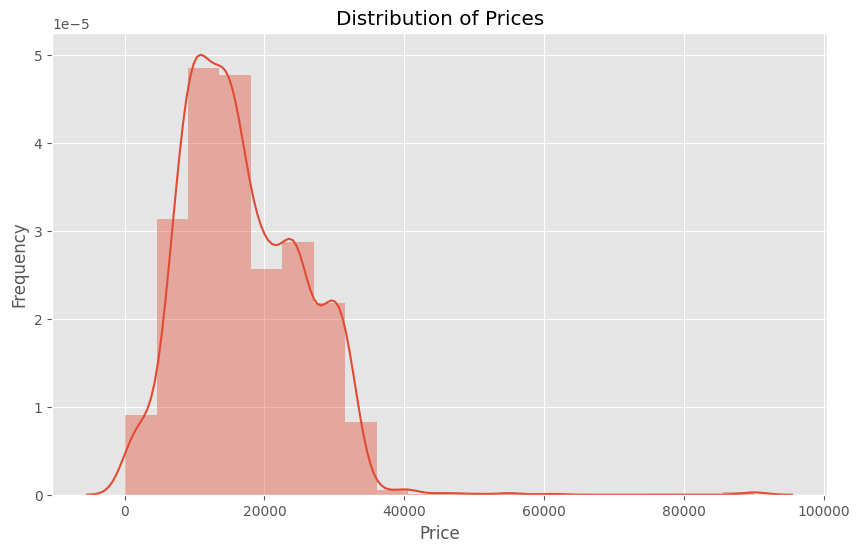

Minimum Price: 73.0
Maximum Price: 89999.0
Average Price: 16974.611681136543
Median Price: 15499.0
Potential Price Ranges:
Low-End: 73.0 - 10499.0
Mid-Range: 10499.0 - 23463.0
High-End: 23463.0 - 89999.0


In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'], bins=20)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Identify price ranges and trends.
print("Minimum Price:", df['price'].min())
print("Maximum Price:", df['price'].max())
print("Average Price:", df['price'].mean())
print("Median Price:", df['price'].median())

# Calculate the quartiles to identify potential price ranges.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Print the potential price ranges.
print("Potential Price Ranges:")
print("Low-End:", df['price'].min(), "-", Q1)
print("Mid-Range:", Q1, "-", Q3)
print("High-End:", Q3, "-", df['price'].max())

#  finding minimum and maximum ratings

In [ ]:
min  = df['ratings'].min()
max  = df['ratings'].max()
print(f'Range Of Rating = ({min},{max})')

Range Of Rating = (2.9,5.0)


# Finding value counts for the rating (how many mobiles got what rating)

In [ ]:
df_rating = df['ratings'].value_counts()
df_rating

4.3    581
4.2    511
4.4    420
4.5    318
4.1    240
4.6    152
4.0    104
4.7     87
3.9     61
3.8     22
3.7     11
3.6      5
3.0      4
3.5      4
2.9      4
3.3      4
3.1      3
5.0      2
4.8      1
Name: ratings, dtype: int64

# Bar plot for ratings

* **Barplots are a type of data visualization used to represent categorical data, where the height or length of bars corresponds to the frequency or proportion of each category.**

<Axes: title={'center': 'Rating Count'}, xlabel='None'>

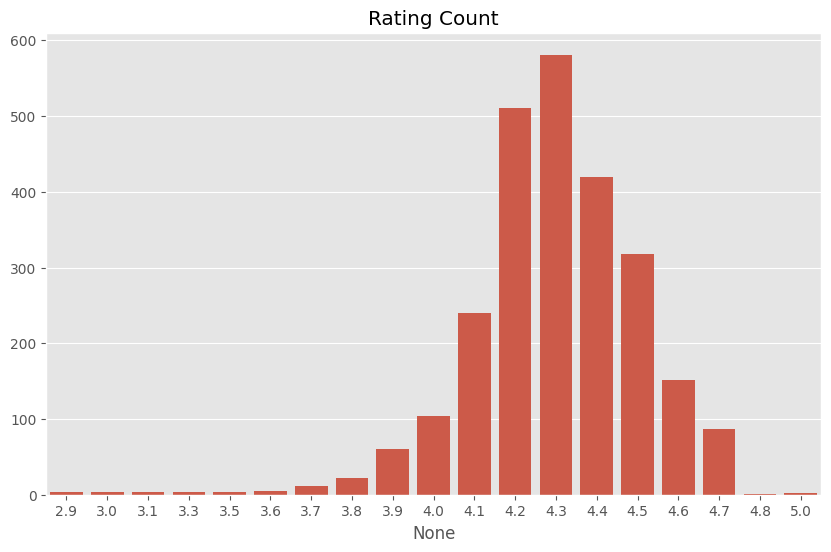

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Rating Count')
sns.barplot(x = df_rating.index, y = df_rating.values)

# Acquiring image from the imagURL

* image taken randomly

In [ ]:
import requests
from PIL import Image
import io
from io import BytesIO

In [ ]:
#response = requests.get('	https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/a/m/w/-original-imag47fdfgmg2gnh.jpeg?q=70')

(-0.5, 232.5, 311.5, -0.5)

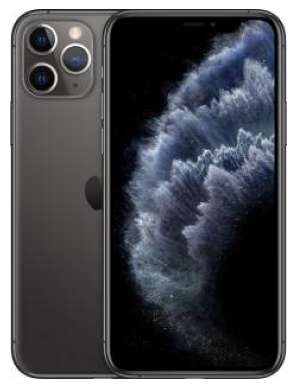

In [ ]:
image_data = BytesIO(response.content)

image = Image.open(image_data)

plt.imshow(image)
plt.axis('off')

# Finding most popular mobile

In [ ]:
popular_products = pd.DataFrame(df.groupby('name')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(10)

,ratings
name,
"OPPO Reno10 5G (Ice Blue, 256 GB)",14
"OPPO Reno10 5G (Silvery Grey, 256 GB)",7
SAMSUNG Metro 313,7
"OnePlus Nord CE 2 5G (Gray Mirror, 128 GB)",5
"OnePlus Nord 2T 5G (Gray Shadow, 128 GB)",5
"OnePlus 10R 5G (Sierra Black, 256 GB)",5
"OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)",4
"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",4
"Xiaomi 11Lite NE (Jazz Blue, 128 GB)",4


* from the above we can see that mobile: OPPO Reno10 5G (Ice Blue, 256 GB) is tje most popular mobile

# Bar plot for most popular product

<Axes: xlabel='name'>

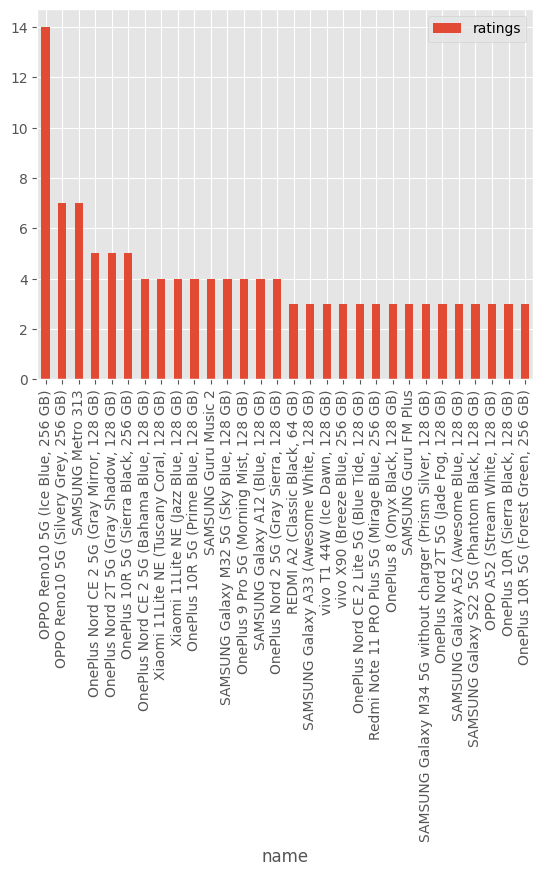

In [ ]:
most_popular.head(30).plot(kind = "bar")

* Analysis:
The above graph gives us the most popular products (arranged in descending order) sold.

For eaxmple, mobile, OPPO Reno10 5G (Ice Blue, 256 GB) has sales of over 14, the next most popular mobile.

# Scatter plot using plotly express

* **Price vs. Ratings**

In [ ]:
import plotly.express as px

# Create a scatter plot of price vs. ratings
fig = px.scatter(df, x="price", y="ratings", color="name", hover_name="name", title='Price vs. Ratings')
fig.show()


* Scatter plots help in identifying relationships or patterns between two variables. By visually inspecting the plot, you can quickly assess whether there is a positive, negative, or no relationship between the variables.

# Heat map

* Visualizing relationships in tabular data: Heatmaps are particularly useful for visualizing relationships in tabular data by representing each cell's value with a color. This allows us to quickly identify patterns, trends, and relationships within the data.

* Correlation analysis: Heatmaps are commonly used to visualize correlation matrices, where each cell represents the correlation coefficient between two variables. By using a color scale to represent the strength and direction of correlations, heatmaps make it easy to identify strong, weak, positive, and negative correlations.

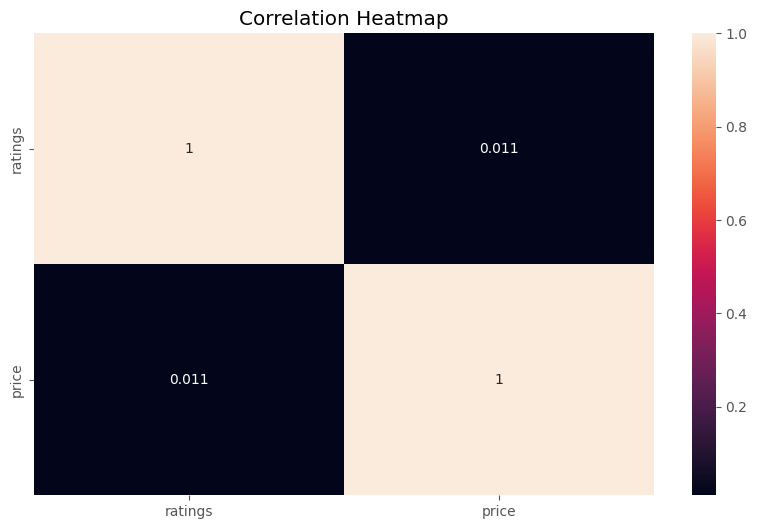

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()


# 6. Recommendation System

# Model-based collaborative filtering system
* Recommend mobiles to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

In [ ]:
mobile_ratings = df.head(10000)

#  Implement a recommendation system based on ratings, prices to suggest items to users.

# Utility Matrix based on products sold and user reviews

* An utlity matrix is consists of all possible user-item preferences (ratings, prices) details represented as a matrix. The utility matrix is sparce as none of the users would buy all the items in the list, hence, most of the values are unknown.

In [ ]:
ratings_utility_matrix = mobile_ratings.pivot_table(index='name', columns='ratings', values='price', fill_value=0)
ratings_utility_matrix.head()

ratings,2.9,3.0,3.1,3.3,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
name,,,,,,,,,,,,,,,,,,,
"10A (Black, 64 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,9999.0,0.0,0.0,0,0,0,0
"10T 5G (Cosmic Black, 128 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,23999.0,0.0,0,0,0,0
"11 Lite NE (Jazz Blue, 128 GB)",0,0,0,0,0,0,0.0,0,0,22898.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
"13 pro (Ceramic Black, 256 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,14463.0,0.0,0.0,0,0,0,0
"13 pro (Ceramic White, 256 GB)",0,0,0,0,0,9454,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


* An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all the items in the list, hence, most of the values are unknown.

In [ ]:
ratings_utility_matrix.shape

(2128, 19)

In [ ]:
X = ratings_utility_matrix
X.head()

ratings,2.9,3.0,3.1,3.3,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
name,,,,,,,,,,,,,,,,,,,
"10A (Black, 64 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,9999.0,0.0,0.0,0,0,0,0
"10T 5G (Cosmic Black, 128 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,23999.0,0.0,0,0,0,0
"11 Lite NE (Jazz Blue, 128 GB)",0,0,0,0,0,0,0.0,0,0,22898.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
"13 pro (Ceramic Black, 256 GB)",0,0,0,0,0,0,0.0,0,0,0.0,0.0,0.0,14463.0,0.0,0.0,0,0,0,0
"13 pro (Ceramic White, 256 GB)",0,0,0,0,0,9454,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [ ]:
X.shape

(2128, 19)

# Singular Value Decomposition (SVD)

* Decomposing a matrix means breaking it down into simpler, more manageable components.
* Matrix decomposition techniques, such as Singular Value Decomposition (SVD) or Principal Component Analysis (PCA), can be used to reduce the dimensionality of a dataset. By representing data in terms of fewer dimensions, it becomes easier to visualize and analyze.

In [ ]:
SVD = TruncatedSVD(n_components=10) # This line initializes an SVD object with n_components set to 10. n_components specifies the number of components to retain after the decomposition. In this case, it will retain the 10 most significant components.
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(2128, 10)

# Correlation Matrix

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(2128, 2128)

# Assuming the customer buys Mobile # A70 (randomly chosen)

In [ ]:
X.index[6]

'A70'

# Index of mobile purchased by customer

In [ ]:
i = "A70"

product_names = list(X.index)
product_name = product_names.index(i)
product_name

6

# correlation of mobile purchased

In [ ]:
correlation_product_name = correlation_matrix[product_name]
correlation_product_name.shape

(2128,)

* **Correlation for all mobiles with the mobile purchased by the customer based on mobile rated by other customers people who bought the same product.**

# Recommending top 10 highly correlated products in sequence

In [ ]:
Recommend = list(X.index[correlation_product_name > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]



['11 Lite NE (Jazz Blue, 128 GB)',
 'Infinix Hot 12 Pro (Electric Blue, 128 GB)',
 'Infinix Hot 12 Pro (Halo White, 128 GB)',
 'Infinix Hot 12 Pro (Lightsaber Green, 128 GB)',
 'Infinix Hot 12 Pro (Racing Black, 128 GB)',
 'Infinix Hot 4 Pro (Magic Gold, 16 GB)',
 'Infinix Zero 5G 2023 TURBO (Coral Orange, 256 GB)',
 'Infinix Zero 5G 2023 TURBO (Pearly White, 256 GB)',
 'MOTOROLA Edge 20 Pro 5G (Iridescent Cloud, 128 GB)']

* Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

#  7. Implement a recommendation system based on ratings, prices to suggest items to users(Using cosine function)

In [ ]:
# Create a user-item matrix using pivot table
user_item_matrix = df.pivot_table(index='name', columns='ratings', values='price', fill_value=0)

# Calculate the cosine similarity between users
cosine_sim = sklearn.metrics.pairwise.cosine_similarity(user_item_matrix)

# Get the index of the item the user is interested in
item_index = user_item_matrix.index.get_loc('A70')

# Get the similarity scores for the item
similarity_scores = cosine_sim[item_index]

# Get the top 10 most similar items
similar_items = user_item_matrix.index[similarity_scores.argsort()[-10:]]

# Print the similar items
print("Similar Items:")
print(similar_items)

Similar Items:
Index(['Infinix Zero 5G 2023 TURBO (Coral Orange, 256 GB)',
       'Mi 11X Pro 5G (Cosmic Black, 256 GB)',
       'Mi 11X Pro 5G (Celestial Silver, 128 GB)',
       'SAMSUNG Galaxy S23 Ultra 5G (Green, 256 GB)',
       'SAMSUNG Galaxy S20 FE (Cloud Lavender, 128 GB)',
       'Infinix Hot 12 Pro (Electric Blue, 128 GB)',
       'SAMSUNG Galaxy S20 FE (Cloud Navy, 128 GB)',
       'Infinix Hot 12 Pro (Halo White, 128 GB)',
       'OnePlus 9 5G (Astral Black, 256 GB)',
       'OPPO A76 (Glowing Blue, 128 GB)'],
      dtype='object', name='name')


* Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

# 8. find product using name

In [ ]:
product_name = input("Enter the name of the product you are interested in: ")


# Get the index of the product in the DataFrame
product_index = df[df['name'] == product_name].index[0]

# Get the row of the product from the DataFrame
product_row = df.iloc[product_index]

# Print the product information
print("Product Name:", product_row['name'])
print("Price:", product_row['price'])
print("Ratings:", product_row['ratings'])


# 9. Classfying mobiles based on Price range

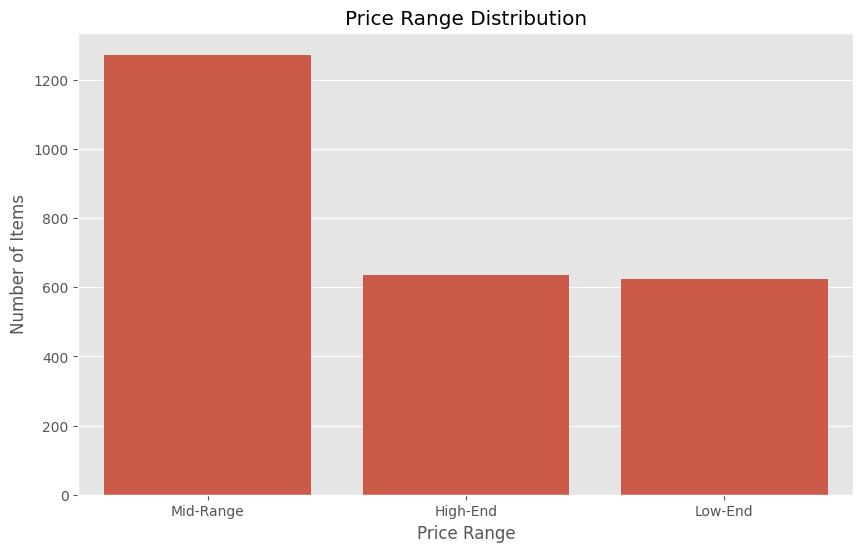

In [ ]:
def get_price_range(price):
  if price < Q1:
    return "Low-End"
  elif price < Q3:
    return "Mid-Range"
  else:
    return "High-End"

# Create a new column in the DataFrame to store the price range
df['price_range'] = df['price'].apply(get_price_range)

# Group the DataFrame by price range and count the number of items in each range
price_range_counts = df['price_range'].value_counts()

# Plot the price range counts
plt.figure(figsize=(10, 6))
plt.title('Price Range Distribution')
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.show()

* from the above graph we can notice that they are more mobiles in mid_range

In [ ]:
df.head()

,name,ratings,price,imgURL,corpus,price_range
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999.0,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,High-End
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999.0,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,Mid-Range
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149.0,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,Mid-Range
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999.0,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,Mid-Range
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537.0,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,Low-End


# 10. Recommendation system based on price range

In [ ]:
def recommend_by_price_range(df, price_range):
    # Filter the DataFrame based on the price range
    filtered_df = df[(df['price'] >= price_range[0]) & (df['price'] <= price_range[1])]

    # Sort the filtered DataFrame by ratings in descending order
    sorted_df = filtered_df.sort_values('ratings', ascending=False)

    # Return the top 10 recommended items
    return sorted_df.head(10)

# Example usage:
# Get user input for price range
min_price = float(input("Enter the minimum price: "))
max_price = float(input("Enter the maximum price: "))
price_range = [min_price, max_price]

# Recommend items based on the user's input price range
recommended_items = recommend_by_price_range(df, price_range)

# Print the recommended items
for index, item in recommended_items.iterrows():
    print("Name:", item['name'], "Price:", item['price'], "Price Range:", get_price_range(item['price']))
    print()


Enter the minimum price: 10000
Enter the maximum price: 20000
Name: Tecno Camon 19 Neo (Ice Mirror, 6 GB) Price: 13995.0 Price Range: Mid-Range

Name: SAMSUNG Galaxy A12 (Blue, 128 GB) Price: 14999.0 Price Range: Mid-Range

Name: Tecno Spark 10 5G (Meta White, 64 GB) Price: 12899.0 Price Range: Mid-Range

Name: APPLE iPhone 6 Plus (Space Grey, 128 GB) Price: 14964.0 Price Range: Mid-Range

Name: APPLE iPhone SE 3rd Gen (Product (Red), 256 GB) Price: 18937.0 Price Range: Mid-Range

Name: Tecno Spark 10 5G (Meta Black, 64 GB) Price: 14900.0 Price Range: Mid-Range

Name: APPLE iPhone 13 Pro (Gold, 1 TB) Price: 13927.0 Price Range: Mid-Range

Name: APPLE iPhone XS Max (Silver, 512 GB) Price: 13828.0 Price Range: Mid-Range

Name: APPLE iPhone 14 Pro (Gold, 512 GB) Price: 19927.0 Price Range: Mid-Range

Name: APPLE iPhone 11 Pro Max (Space Grey, 512 GB) Price: 19728.0 Price Range: Mid-Range



# 11. Recommended mobiles in image

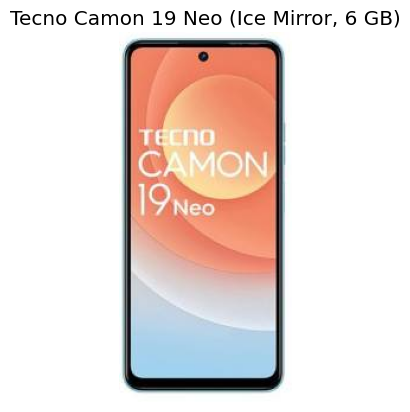

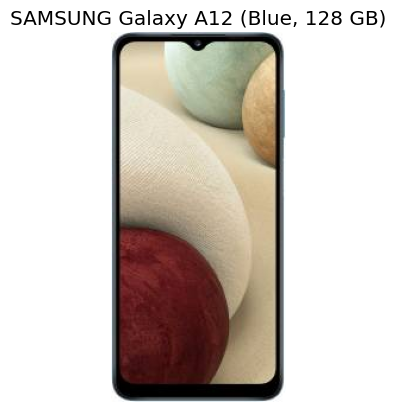

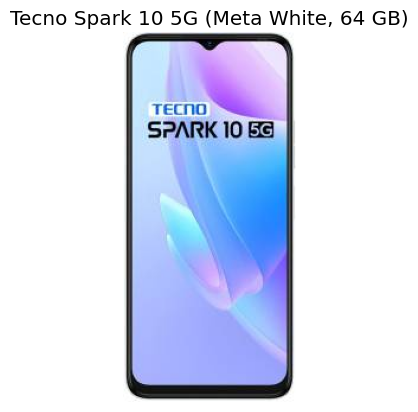

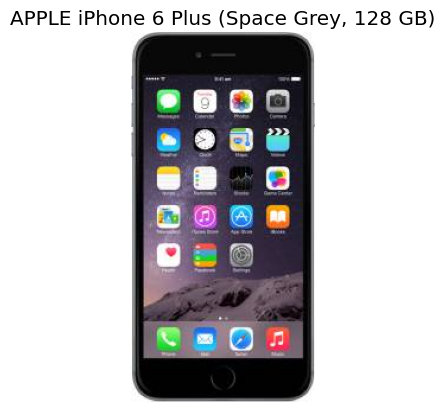

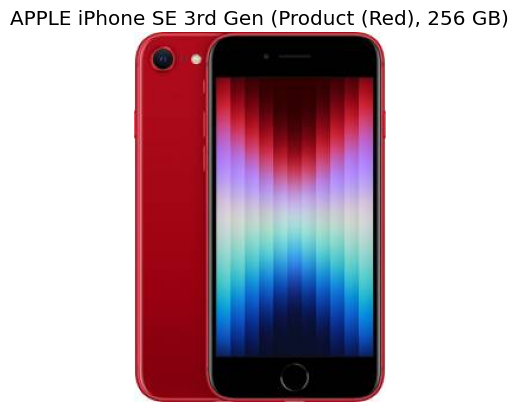

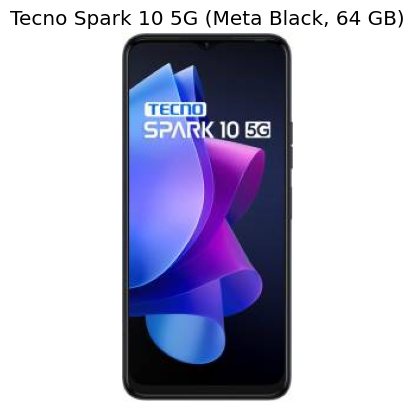

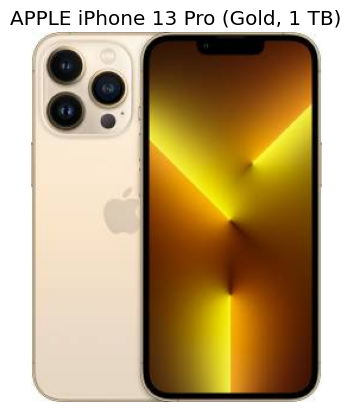

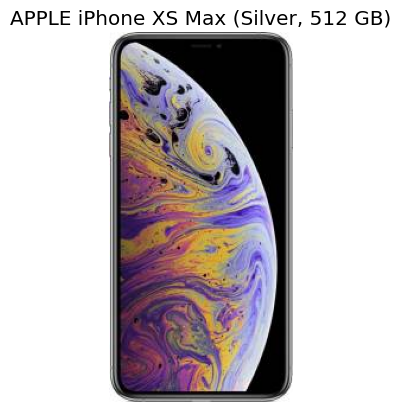

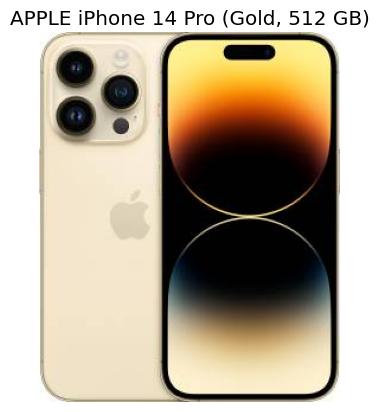

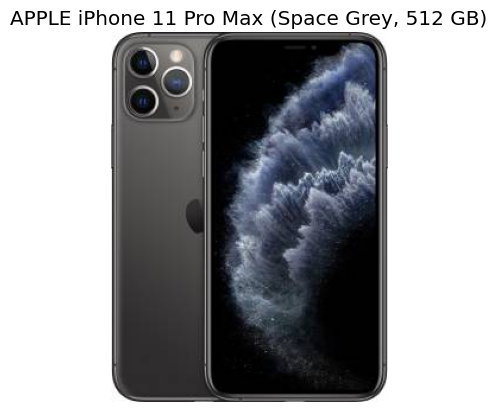

In [ ]:
for index, item in recommended_items.iterrows():
    # Get the URL of the item's image
    image_url = item['imgURL']
    # Get the image data from the URL
    response = requests.get(image_url)
    image_data = BytesIO(response.content)

    # Open and display the image
    image = Image.open(image_data)
    plt.imshow(image)
    plt.axis('off')
    plt.title(item['name'])
    plt.show()